# Análise de dados espaciais com o Python

Utilizaremos:

- Geopandas
- netCDF4
- xarray
- rasterio

Aprenderemos a abrir arquivos tipo shapefile, recortar pontos, criar geometrias, abrir rasters e arquivos netCDF.

## Introdução ao geopandas
O geopandas funciona como o pandas, mas com funcionalidades adicionais que lidam com geometrias.\
Este pacote possibilita plotarmos no espaço, abrir arquivos tipo shapefile, recortar pontos e etc. \
Leiam a documentação em: https://geopandas.org/en/stable/getting_started/introduction.html

In [49]:
import geopandas as gpd
import pandas as pd

In [42]:
# Leremos um arquivo shapefile utilizando o geopandas

# Caminho para o arquivo que queremos ler
pathShapefile = r"C:\PosGraduacao\ENS410064\2024\dados\SC_distritos_CD2022\SC_distritos_CD2022.shp"

# Abro o arquivo com o geopandas
geoData = gpd.read_file(pathShapefile)

# Mostrar as primeiras linhas
geoData.head()

,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_RGINT,NM_RGINT,CD_RGI,NM_RGI,CD_CONCURB,NM_CONCURB,geometry
0,4,Sul,42,Santa Catarina,4200051,Abdon Batista,420005105,Abdon Batista,4204,Chapecó,420008,Joaçaba - Herval d'Oeste,None,None,"POLYGON ((-51.04368 -27.64094, -51.04398 -27.6..."
1,4,Sul,42,Santa Catarina,4200101,Abelardo Luz,420010105,Abelardo Luz,4204,Chapecó,420011,Xanxerê,None,None,"POLYGON ((-52.12152 -26.68147, -52.12169 -26.6..."
2,4,Sul,42,Santa Catarina,4200200,Agrolândia,420020005,Agrolândia,4207,Blumenau,420022,Rio do Sul,None,None,"POLYGON ((-49.83981 -27.52449, -49.83982 -27.5..."
3,4,Sul,42,Santa Catarina,4200309,Agronômica,420030905,Agronômica,4207,Blumenau,420022,Rio do Sul,None,None,"POLYGON ((-49.68847 -27.31815, -49.68822 -27.3..."
4,4,Sul,42,Santa Catarina,4200408,Água Doce,420040805,Água Doce,4204,Chapecó,420008,Joaçaba - Herval d'Oeste,None,None,"POLYGON ((-51.53125 -27.05144, -51.53139 -27.0..."


Index(['CD_REGIAO', 'NM_REGIAO', 'CD_UF', 'NM_UF', 'CD_MUN', 'NM_MUN',
       'CD_DIST', 'NM_DIST', 'CD_RGINT', 'NM_RGINT', 'CD_RGI', 'NM_RGI',
       'CD_CONCURB', 'NM_CONCURB', 'geometry'],
      dtype='object')

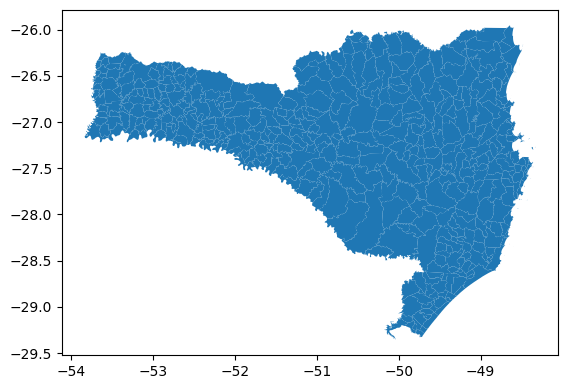

In [43]:
# Plotando o arquivo do geopandas - utilizando o matplotlib

geoData.plot()
geoData.columns

<Axes: >

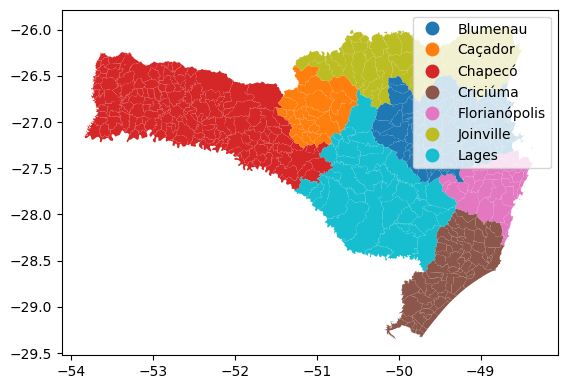

In [44]:
# Plotando com estilo - usar uma coluna do geoData para colorir o mapa

geoData.plot('NM_RGINT', legend = True)

<Axes: >

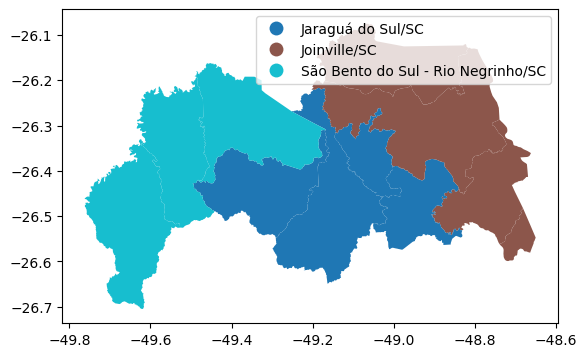

In [45]:
# Selecionar uma região de interesse

# Usando um código de região como exemplo
cod = 'Joinville'

# Plotando a região selecionada
geoData[geoData['NM_RGINT']==cod].plot('NM_CONCURB', legend = True)

## Abrindo arquivos com focos de queimadas no mundo.
Fonte de dados: https://www2.acom.ucar.edu/modeling/finn-fire-inventory-ncar \
Acesso para download: https://rda.ucar.edu/datasets/d312009/dataaccess/# \
Ou arquivo de um único dia: https://www.acom.ucar.edu/acresp/MODELING/finn_emis_txt/FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt.gz

# Utilizando script para download

import sys, os
from urllib.request import build_opener

opener = build_opener()

filelist = [
  'https://data.rda.ucar.edu/d312009/2003_eachfire_modis/FINNv2.5_mod_GEOSCHEM_2003_c20211213.txt.gz'
]

for file in filelist:
    ofile = os.path.basename(file)
    sys.stdout.write("downloading " + ofile + " ... ")
    sys.stdout.flush()
    infile = opener.open(file)
    outfile = open(ofile, "wb")
    outfile.write(infile.read())
    outfile.close()
    sys.stdout.write("done\n")

<Axes: >

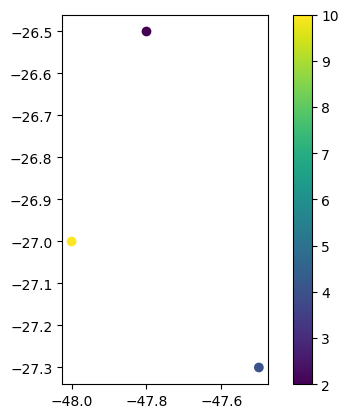

In [61]:
# Criando um dataframe com pontos e transformando em geodataframe

dataSample = pd.DataFrame({'lon': [-48,-47.5,-47.8], 'lat': [-27,-27.3,-26.5], 'fire':[10,4,2]})
dataSample.head()

# Conversão para geodataframe
gdf = gpd.GeoDataFrame(
    dataSample, geometry=gpd.points_from_xy(dataSample.lon,dataSample.lat),crs="EPSG:4326"
)

gdf.plot('fire', legend = True)

In [62]:
# Plotando o ponto no espaço
# Precisarmeos instalar os pacotes branca e folium - pip install branca folium mapclassify
# gdf.explore()

In [66]:
# Abrindo arquivo do FINN - queimadas e emissões no dia 08/07/2024
pathFinn = r"C:\PosGraduacao\ENS410064\2024\dados\FINNv2.5.1_modvrs_nrt_GEOSCHEM_20240708.txt"

finn = pd.read_csv(pathFinn)
print('Este é o número de queimadas nesta data: ' + str(finn.shape[0])) 
finn.head()

Este é o número de queimadas nesta data: 77396


,DAY,POLYID,FIREID,GENVEG,LATI,LONGI,AREA,BMASS,CO2,CO,...,C3H8,CH2O,GLYC,GLYX,HAC,MEK,MGLY,PRPE,TOLU,XYLE
0,190,1,1,2,68.983,143.080,666800.0,2.784,70930000.0,4443000.0,...,16580.0,111900.0,3684.0,0.0,0.0,55710.0,38680.0,75050.0,52950.0,1381.0
1,190,1,2,2,68.998,143.064,538300.0,2.784,57260000.0,3587000.0,...,13380.0,90330.0,2974.0,0.0,0.0,44980.0,31220.0,60590.0,42750.0,1115.0
2,190,1,3,2,68.997,143.082,455400.0,2.784,48440000.0,3034000.0,...,11320.0,76410.0,2516.0,0.0,0.0,38050.0,26410.0,51250.0,36160.0,943.3
3,190,1,4,2,68.999,143.040,424900.0,2.784,45200000.0,2831000.0,...,10560.0,71300.0,2347.0,0.0,0.0,35500.0,24650.0,47820.0,33740.0,880.2
4,190,2,5,2,68.879,140.521,433500.0,2.784,46110000.0,2888000.0,...,10770.0,72730.0,2394.0,0.0,0.0,36220.0,25140.0,48790.0,34420.0,897.9


In [69]:
finn.columns

Index(['DAY', 'POLYID', 'FIREID', 'GENVEG', 'LATI', 'LONGI', 'AREA', 'BMASS',
       'CO2', 'CO', 'CH4', 'NMOC', 'H2', 'NOXasNO', 'SO2', 'PM25', 'TPM',
       'TPC', 'OC', 'BC', 'NH3', 'NO', 'NO2', 'NMHC', 'PM10', ' ACET', 'ALD2',
       'ALK4', 'BENZ', 'C2H2', 'C2H4', 'C2H6', 'C3H8', 'CH2O', 'GLYC', 'GLYX',
       'HAC', 'MEK', 'MGLY', 'PRPE', 'TOLU', 'XYLE'],
      dtype='object')

In [88]:
# Transformar dataframe do Finn em geodataframe

# Conversão para geodataframe
gdf = gpd.GeoDataFrame(
    finn, geometry=gpd.points_from_xy(finn.LONGI,finn.LATI),crs="EPSG:4674"
)

#gdf.explore('CO2', legend = True)

<Axes: >

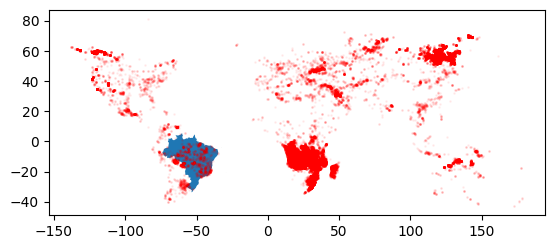

In [89]:
# Verificando focos de calor no mundo e no Brasil

# Abrindo shape do brasil
shapeBR = gpd.read_file(r"C:\PosGraduacao\ENS410064\2024\dados\BR_Pais_2022\BR_Pais_2022.shp")

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

shapeBR.plot(ax=ax)
gdf.plot(ax=ax,color='red',alpha=0.05,markersize=1)

In [99]:
# Recortando dados dentro do Brasil

finnBR = gdf.clip(shapeBR)

AttributeError: PathCollection.set() got an unexpected keyword argument 'legend'

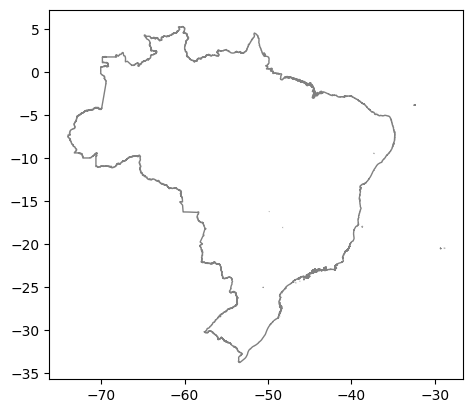

In [179]:
# Plotando

fig, ax = plt.subplots()
shapeBR.boundary.plot(ax=ax,color='gray',linewidth=1)
#finnBR.plot(ax=ax,
#            alpha=1,
#            markersize=50*finnBR.FIREID/max(finnBR.FIREID),
#            c=finnBR.CO,
#            cmap='Reds',
#            legend=True)
ax.scatter(finnBR.LONGI,finnBR.LATI,alpha=0.5,s=finnBR.AREA/finnBR.AREA.min(),c=finnBR.CO2,cmap='Reds',legend=True)

In [133]:
# Cortando pontos por estado
shapeUF = gpd.read_file(r"C:\PosGraduacao\ENS410064\2024\dados\BR_UF_2022\BR_UF_2022.shp")
fireInUF = []
for uf in range(0,shapeUF.shape[0]):
    finnUF = finnBR.clip(shapeUF.geometry[uf])
    fireInUF.append(finnUF)
fireInUF.head()

,DAY,POLYID,FIREID,GENVEG,LATI,LONGI,AREA,BMASS,CO2,CO,...,CH2O,GLYC,GLYX,HAC,MEK,MGLY,PRPE,TOLU,XYLE,geometry
29447,190,21097,20676,2,0.607,-60.259,79690.0,0.7642,2327000.0,145700.0,...,3670.0,120.8,0.0,0.0,1827.0,1269.0,2462.0,1737.0,45.31,POINT (-60.259 0.607)
29446,190,21097,20676,3,0.607,-60.259,876600.0,4.1560,136000000.0,12100000.0,...,393300.0,149400.0,0.0,104000.0,196600.0,69960.0,363000.0,194700.0,7563.00,POINT (-60.259 0.607)


AttributeError: 'Polygon' object has no attribute 'plot'

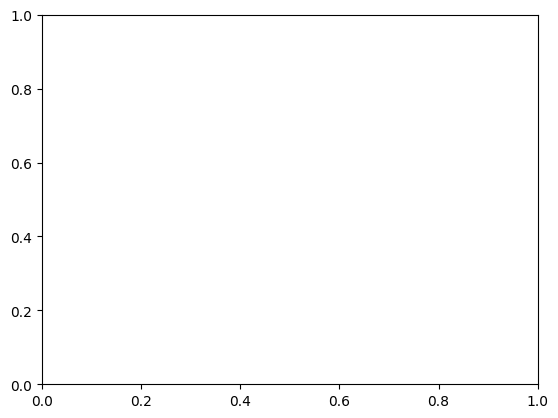

In [147]:
fig, ax = plt.subplots()
plot_shape = shapeUF.geometry[0]

plot_shape.plot()
fireInUF[0].plot(ax=ax,
            alpha=1,
            markersize=50*finnBR.FIREID/max(finnBR.FIREID),
            c=finnBR.CO,
            cmap='Reds',
            legend=True)

In [151]:
# Quantificando focos por Estado

dfUF = pd.DataFrame()
dfUF['UF'] = shapeUF.NM_UF
dfUF['fireCount'] = 0
for ii,fire in enumerate(fireInUF):
    #print(shapeUF.NM_UF[ii] + ' ' + str(fire.shape[0]))
    dfUF.iloc[ii,1] = fire.shape[0]

dfUF

,UF,fireCount
0,Acre,23
1,Amazonas,85
2,Pará,209
3,Amapá,0
4,Tocantins,74
5,Maranhão,106
6,Piauí,29
7,Ceará,13
8,Rio Grande do Norte,9
9,Paraíba,4


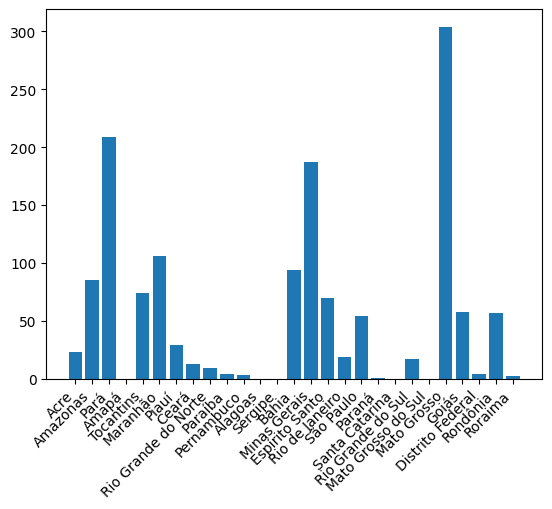

In [198]:
# Plotando dataframe

fig, ax = plt.subplots(1)
ax.bar(dfUF.UF, dfUF.fireCount)
plt.xticks(rotation=45,ha='right')
plt.show()

# Dados tipo raster

Trabalharemos com a biblioteca rasterio:
- pip install rasterio

Baixem o SRTM utilizando a plataforma: https://hoinaski.prof.ufsc.br/AERMOD_online/AERMODyourRepo

A documentação do pacote está em: https://rasterio.readthedocs.io/en/stable/quickstart.html

In [200]:
import rasterio

In [201]:
# Abrindo arquivo do SRTM usando o rasterio
dataset = rasterio.open(r"C:\PosGraduacao\ENS410064\2024\dados\mergedSRTM.tif")

In [213]:
# Determinando tamanho do dataset
print(dataset.width)
print(dataset.height)
print(dataset.bounds)

3614
3371
BoundingBox(left=-49.295972222222225, bottom=-26.765694444444442, right=-48.29208333333334, top=-25.829305555555553)


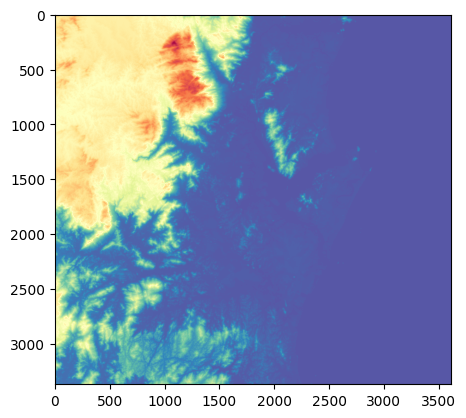

In [217]:
# Plotando rasterio
fig, ax = plt.subplots()
ax.imshow(dataset.read(1),cmap='Spectral_r')

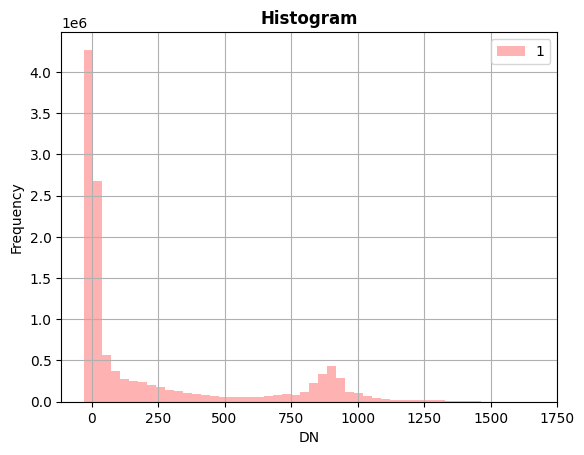

In [218]:
# Outro plot
from rasterio.plot import show_hist

show_hist(

    dataset, bins=50, lw=0.0, stacked=False, alpha=0.3,

    histtype='stepfilled',title="Histogram")

In [224]:
# Transformando para um array numpy
import numpy as np
arr = np.array(dataset.read(1))
arr.shape

(3371, 3614)

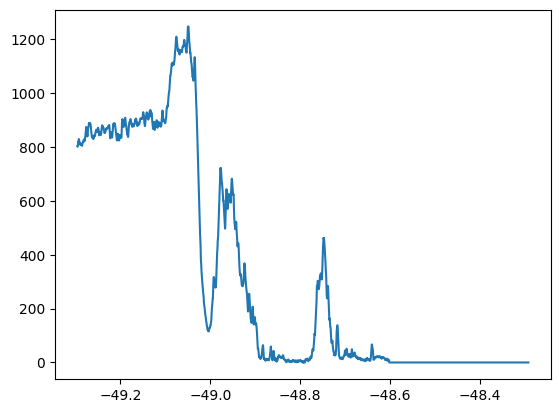

In [240]:
# Acessando matriz arr
height = dataset.shape[0]
width = dataset.shape[1]
cols, rows = np.meshgrid(np.arange(width), np.arange(height))
xs, ys = rasterio.transform.xy(dataset.transform, rows, cols)
lons = np.array(xs)
lats = np.array(ys)

xlon = xs.reshape(arr.shape)
xlon.shape

ylon = ys.reshape(arr.shape)
ylon.shape

plt.plot(xlon[1000,:], arr[1000,:])